<a href="https://colab.research.google.com/github/tomitheninja/university/blob/master/szte/ml/ml_3_baselines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Egyszerű döntési szabályok

A statisztikai elemzések és vizualizációk definícióit, illetve hogy miért szükségesek ezek a gépi tanuláshoz, olvasd el a kapcsolodó [előadás olvasóleckében](http://www.inf.u-szeged.hu/~rfarkas/ML20/baseline.html)!

Ebben a leckében a [student performance](https://archive.ics.uci.edu/ml/datasets/student+performance#) adatbázist fogjuk használni. Ebben egy középiskolai kurzus diákjai adták meg adataikat és azt akarjuk predikálni, hogy sikeresen el fogják-e tudni végezni a kurzust.

In [ ]:
import pandas as pd

In [ ]:
# töltsük be az adatbázist
df = pd.read_csv("https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-por.csv")
df.head() # nézzünk rá!

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


valami nagyon nem stimmel...

A read_csv vesszőt vár oszlopelválasztó karakternek, itt meg pontosvessző van (ezért egy oszlopnak tekintette az egész sort).


[`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) dokumentáció

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-por.csv", sep=';') # sep argumentummal megadhatjuk az elválasztó karaktert
df.head() # mindjárt szebben néz ki :)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.shape # adatbázis méretei

(649, 33)

In [ ]:
df.columns # oszlopok nevei

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Jellemzők leíró statisztikái

In [ ]:
# diszkrét változó értékeinek gyakorisága
df.Fjob.value_counts() # Fjob a diák apjának foglalkozása

other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64

In [ ]:
# egy folytonos változó statisztikái
print('Min:', df.age.min())
print('Max:', df.age.max())
print('Átlag:', df.age.mean())
print('Medián:', df.age.median())
print('Szórás:', df.age.std())

Min: 15
Max: 22
Átlag: 16.7442218798151
Medián: 17.0
Szórás: 1.2181376394800618


In [ ]:
# A describe() az összes folytonos jellemző alapstatisztikáiról ad egy táblázatot (eredménye egy DataFrame)
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## Vizualizáció pythonban

A leggyorsabban úgy szerezhetünk az adatbázisunkról benyomásokat, ha vizualizáljuk az egyes változókat, illetve az egyes jellemzők és a célváltozó közötti összefüggéseket. A python notebookok egyből, helyben megjelenítik az ábrákat, ami az adatelemzést igen gyorssá és interaktívvá teszi. 

Bővebben a python adatvizualizációról [itt](https://pandas.pydata.org/pandas-docs/stable/visualization.html) olvashatsz.

In [ ]:
# kategórikus változó hisztogramja
df.Fjob.hist()

NameError: ignored

In [ ]:
# itt egy tortadiagrammon jelenítjük meg a diszkrét változó eloszlását
df.sex.value_counts().plot.pie()

In [ ]:
df.sex.value_counts().plot.pie(figsize=(6, 6)) # figsize-at nagyobb képeket is készíthetünk

In [ ]:
# folytonos változó hisztogramja
df.age.hist()

In [ ]:
# a hist() alapértelmezettként 10 egyenlő méretű intervallumra osztja az értékkészletet
# jelen esetben 8 értékünk van csak, ésszerű 8 intervallumra osztani
df.age.hist(bins=8) # bins az intervallumok száma

In [ ]:
# a vizualizációt kedvünkre testreszabhatjuk!
df.age.hist(bins=8, color='c', edgecolor='k', alpha=0.65) # itt például az oszlopok színét, keretét és átlátszóságát állítjuk be

In [ ]:
# ha simán a plot()-ot hívjuk meg numerikus jellemzőre, az mint idősor rajzolja ki
df.age.plot()

In [ ]:
# boxplot folytonos változó jellemzésére
df.age.plot.box()

In [ ]:
# összes folytonos változó boxplotja egymás mellett
df.loc[:,'G1':'G3'].plot.box(figsize=(10,5)) # a három teszteredményt szeretnénk egymás mellett látni

## Konstans baseline

Legyen a predikciós feladatunk most egy osztályozási feladat, ahol a két osztályunk (`G3` a záró teszten elért pontszám): 

*megfelelt* ha `G3>=10` és

*nem felelt meg* ha `G3<10`

In [ ]:
# vegyünk fel egy új oszlopot az osztályozási feladatnak
df['megfelelt'] = df.G3>=10
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,megfelelt
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,True
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,True
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,True
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,True
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,True


In [ ]:
df.megfelelt.value_counts()

True     549
False    100
Name: megfelelt, dtype: int64

Az adatbázisban jóval több megfelelt címkéjű egyedet láttunk. Ezért a leggyakoribb osztály (most frequent class) baseline mindig a megfelelt=True címkét fogja predikálni.

In [ ]:
print("accuracy:", df.megfelelt.value_counts()[True] / len(df) )

accuracy: 0.8459167950693375


Ha regressziós feladatként fogalmazzuk meg, azaz a végső teszt pontszámát akarjuk megjósolni, akkor a baseline lehet a tanító adatbázison a célváltozó átlaga.

In [ ]:
df.G3.mean() # G3 a folytonos célváltozó, átlaga a konstans dummy predikció:

11.906009244992296

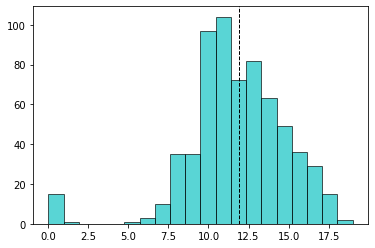

In [ ]:
# vizualizáljuk ezt a baselinet!
# ha egy ábrára több dolgot akarunk kirajzolni a matplotlib.pyplot-hoz kellhet visszanyúlni
import matplotlib.pyplot as plt

plt.hist(df.G3, bins=20, color='c', edgecolor='k', alpha=0.65)
# ax utasítások "rárajzolnak" a meglévő plotra. vline egy függőleges vonal.
plt.axvline(df.G3.mean(), color='k', linestyle='dashed', linewidth=1) # ... aminek a színét, szaggatottságát és vastagságát is formázzuk 

In [ ]:
pred = df.G3.mean()
# regressziónál a kiértékelési metrika lehet az eltérések (predikciós hiba) abszolútértékének átlaga (Mean Absolute Error, MAE)
print('MAE:', (df.G3 - pred).abs().mean())

MAE: 2.405882227250164


## Döntési szabály egyetlen jellemző alapján

Egy kiválasztott jellemző és a célváltozó közti kapcsolatot a leggyorsabban vizualizációval értheti meg a mérnök.


### Két diszkrét változó kapcsolata

In [ ]:
# két diszkrét változó értékeinek együttelőfordulási gyakoriságai
pd.crosstab(df.megfelelt, df.higher)

higher,no,yes
megfelelt,,
False,33,67
True,36,513


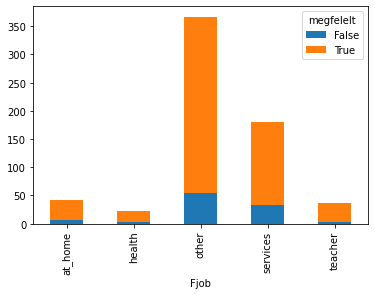

In [ ]:
# vizualizálhatjuk is a kereszttáblát
pd.crosstab(df.Fjob, df.megfelelt).plot(kind='bar', stacked=True)

In [ ]:
# legyen a döntési szabályunk: HA higher==no AKKOR false EGYÉBKÉNT true
~(df.higher=="no")

In [ ]:
pred = ~(df.higher=="no")
pred == df.megfelelt

0       True
1       True
2       True
3       True
4       True
       ...  
644     True
645     True
646    False
647     True
648     True
Length: 649, dtype: bool

In [ ]:
print("accuracy:", (pred == df.megfelelt).sum() / len(df))

accuracy: 0.8412942989214176


### Egy diszkrét és egy folytonos változó kapcsolata

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f22f11cba50>,
      dtype=object)

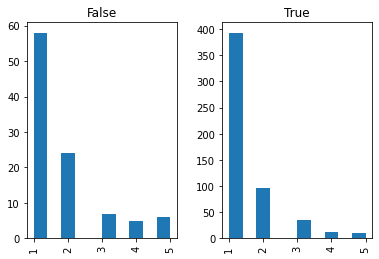

In [ ]:
# egy lehetőség a diszkrét változó értékeire bontani az adathalmazt
# majd a részhalmazokra számított hisztogramokat megjeleníteni 
df.Dalc.hist(bins=10, by=df.megfelelt) # a by a groupby (csoportosítás) rövid megfelelője

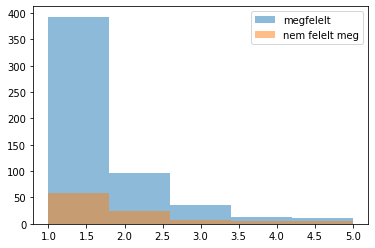

In [ ]:
# A két hisztogramot egyetlen ábrára is elhelyezzhetjük
# Szűrjük le a megfelelt diszkrét változó értékeire az egyedeket.
# A két részhalmazban kirajzoljuk az age hisztogramját. 
plt.hist(df.Dalc[df.megfelelt==True], bins=5, alpha=0.5, label='megfelelt') # alpha az áttetszőséget jelenti
plt.hist(df.Dalc[df.megfelelt==False], bins=5, alpha=0.5, label='nem felelt meg')
plt.legend(loc='upper right') # színek jelentésének magyarázata az ábrára

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


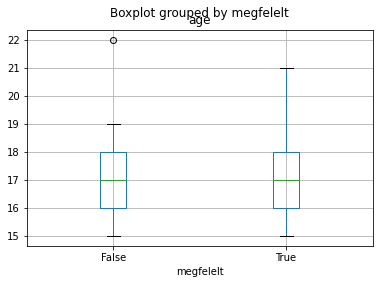

In [ ]:
# egy másik lehetőség, hogy a diszkrét változó értékei szerinti csoportokat boxploton ábrázoljuk
df.boxplot(column='age', by='megfelelt') # a diszkrét változó értékei szerint csoportosított boxok

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f22f11e0b10>,
      dtype=object)

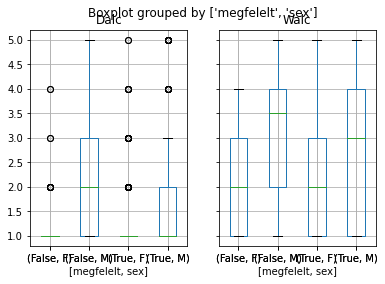

In [ ]:
# több változót is megjeleníthetünk egyszerre
df.boxplot(column=['Dalc','Walc'], by=['megfelelt','sex']) 

In [ ]:
# legyen a döntési szabályunk: HA Dalc > 4 AKKOR false EGYÉBKÉNT true
pred = ~(df.Dalc>4)
print("accuracy:", (pred == df.megfelelt).sum() / len(df))

accuracy: 0.8382126348228043


### Két folytonos változó kapcsolata

Ebben az adatbázisban kevés az igazi folytonos változó, ezért térjünk vissza a [survey adatbázisra](https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/survey.html).

In [ ]:
df_survey = pd.read_csv("https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/MASS/survey.csv")
df_survey.head()

,Unnamed: 0,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


In [ ]:
# scatter plot
df_survey.plot.scatter('Wr.Hnd','Height') # író kéz mérete és magasság kapcsolata

In [ ]:
# összes folytonos változó páronkénti scatter plotja
from pandas.plotting import scatter_matrix
scatter_matrix(df_survey, alpha=0.5, figsize=(10, 10), diagonal='kde')

In [ ]:
# Folytonos változók páronkénti korrelációjának kiszámítása
df_survey[["Wr.Hnd", "NW.Hnd", "Height"]].corr()

,Wr.Hnd,NW.Hnd,Height
Wr.Hnd,1.000000,0.948310,0.600991
NW.Hnd,0.948310,1.000000,0.584127
Height,0.600991,0.584127,1.000000


Figyeljük meg, hogy az iró és nem író kéz méretei közt igen erős (0.948), míg a kézméret és testmagasság közt kevésbé erős korreláció (~0.6) figyelhető meg.

In [ ]:
# konstans baseline
pred = df_survey['Wr.Hnd'].mean()
print('MAE:', (df_survey['Wr.Hnd'] - pred).abs().mean())

MAE: 1.4580328928468853


In [ ]:
# ha a Wr.Hnd megjóslása lenne a regressziós feladat, akkor egy baseline predikciós szabály lehetne a magássából becslés:
ratio = (df_survey.Height / df_survey['Wr.Hnd']).mean()
pred = df_survey.Height / ratio
print('MAE:', (df_survey['Wr.Hnd'] - pred).abs().mean())

MAE: 1.122321633877123


In [ ]:
ratio

9.259494607615498

# Diszkrét jellemzők kódolása

Az sklearn (és egyéb modern gépi tanuló könyvtárak) csak numerikus jellemzőkkel képesek dolgozni. A diszkrét jellemzők értékeit konvertálnunk kell... 

Egy diszkrét változó értékeinek kódolására a bevált módszer ha minden értékre felveszünk egy új bináris jellemzőt és egy konkért egyed esetén pontosan egy új bináris jellemző értéke lesz 1, ami az adott jellemző értékéhez rendeltük, a többi 0 lesz (**one hot encoding**). 

Egy one hot encodolt mátrixban rengeteg helyen szerepel 0 érték, és csak kevés 1 értékünk van. Memória és futásidő okokból nem tároljuk az egész mátrixot egy összefüggő memóriacímen, hanem csak a nem 0 elemeket (azaz pozíció-érték párok listáját). Ezt hívjuk **ritka (sparse) mátrix**nak.

In [ ]:
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder() #one hot encoding
ohe.fit(df) # a jellemzők értékkészletének leszámlálása
ohe.get_feature_names()

In [ ]:
ohe_df = ohe.fit_transform(df) 
ohe_df # egy ritka mátrix (csak a nem nulla elemeket tároljuk)

<649x179 sparse matrix of type '<class 'numpy.float64'>'
	with 22066 stored elements in Compressed Sparse Row format>

In [ ]:
# olvasható formában így néz ki:
pd.DataFrame.sparse.from_spmatrix(ohe_df, columns=ohe.get_feature_names())

In [ ]:
# ha csak a diszkrét változókat one hot encodoljuk:
ohe = preprocessing.OneHotEncoder() #one hot encoding
ohe_df = ohe.fit_transform(df.select_dtypes(include=['object']))
ohe_df = pd.DataFrame.sparse.from_spmatrix(ohe_df, columns=ohe.get_feature_names())
ohe_df = pd.concat( [df.select_dtypes(exclude=['object']), ohe_df], axis=1 )
ohe_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,megfelelt,x0_GP,x0_MS,x1_F,x1_M,x2_R,x2_U,x3_GT3,x3_LE3,x4_A,x4_T,x5_at_home,x5_health,x5_other,x5_services,x5_teacher,x6_at_home,x6_health,x6_other,x6_services,x6_teacher,x7_course,x7_home,x7_other,x7_reputation,x8_father,x8_mother,x8_other,x9_no,x9_yes,x10_no,x10_yes,x11_no,x11_yes,x12_no,x12_yes,x13_no,x13_yes,x14_no,x14_yes,x15_no,x15_yes,x16_no,x16_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,True,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,True,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,True,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,True,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,True,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10,True,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16,True,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9,False,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10,True,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


# Gyakorló feladatok

Ismerd meg az [UCI Post-Operative Patient](https://archive.ics.uci.edu/ml/datasets/Post-Operative+Patient) feladatát.

Építs baseline megoldásokat az [osztályozási feladatra](https://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data) (utolsó, 9. változó a célváltozó)! Mi a legmagasabb accuracy, amit el tudtál érni?



In [ ]:
pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data', 
            header=None)